<a href="https://colab.research.google.com/github/tseykoroman/ML_for_business/blob/main/Tseyko_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Автор материала: Зраев Артем.

Можно использовать в каких угодно целях.

<b> В задании нужно загрузить датасет с данными оттока и ответить на несколько вопросов (написать код). При этом сам датасет уже есть и его необязательно качать с репозитория</b>

Цель задания: проверить базовые навыки работы студентов с Pandas, умение проводить такой же базовый EDA (exploratory data analysis), делать feature engineering и обучать и валидировать модель.

Список столбцов с типами данных в датасете:

- customerID           object
- gender               object
- SeniorCitizen         int64
- Partner              object
- Dependents           object
- tenure                int64
- PhoneService         object
- MultipleLines        object
- InternetService      object
- OnlineSecurity       object
- OnlineBackup         object
- DeviceProtection     object
- TechSupport          object
- StreamingTV          object
- StreamingMovies      object
- Contract             object
- PaperlessBilling     object
- PaymentMethod        object
- MonthlyCharges      float64
- TotalCharges         object
- Churn                object

Данные лежат на google диске по [ссылке](https://drive.google.com/file/d/1g8lsZO25O2SxuCrIYVSDV3eLqmfC-TCZ/view?usp=sharing).

In [134]:
!wget 'https://drive.google.com/uc?export=download&id=1g8lsZO25O2SxuCrIYVSDV3eLqmfC-TCZ' -O WA_Fn-UseC_-Telco-Customer-Churn.csv

--2022-03-22 11:29:58--  https://drive.google.com/uc?export=download&id=1g8lsZO25O2SxuCrIYVSDV3eLqmfC-TCZ
Resolving drive.google.com (drive.google.com)... 172.217.15.110, 2607:f8b0:4004:811::200e
Connecting to drive.google.com (drive.google.com)|172.217.15.110|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pk3kek07ndtsdhlpljpl632ucnnhpqlm/1647948525000/14904333240138417226/*/1g8lsZO25O2SxuCrIYVSDV3eLqmfC-TCZ?e=download [following]
--2022-03-22 11:29:59--  https://doc-08-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pk3kek07ndtsdhlpljpl632ucnnhpqlm/1647948525000/14904333240138417226/*/1g8lsZO25O2SxuCrIYVSDV3eLqmfC-TCZ?e=download
Resolving doc-08-c0-docs.googleusercontent.com (doc-08-c0-docs.googleusercontent.com)... 142.250.73.225, 2607:f8b0:4004:82a::2001
Connecting to doc-08-c0-docs.googleusercontent.com (doc-08-c0-docs.googleus

In [135]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import itertools

import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


##### 1. Какое соотношение мужчин и женщин в представленном наборе данных?

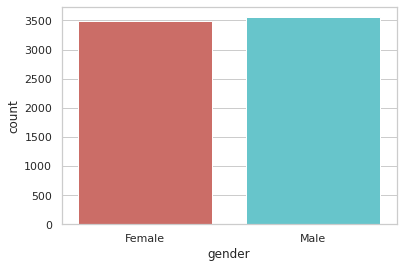

In [136]:
sns.countplot(x='gender', data=df, palette='hls')
plt.show()


In [137]:
print(f'Количество значений для каждого уникального значения поля gender :')
print(df["gender"].value_counts())


Количество значений для каждого уникального значения поля gender :
Male      3555
Female    3488
Name: gender, dtype: int64


##### 2. Какое количество уникальных значений у поля InternetService?

In [119]:
print(f'Количество значений для каждого уникального значения поля InternetService :')
print(df["InternetService"].value_counts())

print(f'Уникальные значения поля InternetService: {df["InternetService"].unique()}')

Количество значений для каждого уникального значения поля InternetService :
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
Уникальные значения поля InternetService: ['DSL' 'Fiber optic' 'No']


##### 3. Выведите статистики по полю TotalCharges (median, mean, std).

In [120]:
print(f'Mean для поля TotalCharges: {pd.to_numeric(df["TotalCharges"], errors="coerce").mean()}')
print(f'Median для поля TotalCharges: {pd.to_numeric(df["TotalCharges"], errors="coerce").median()}')
print(f'Std для поля TotalCharges: {pd.to_numeric(df["TotalCharges"], errors="coerce").std()}')

Mean для поля TotalCharges: 2283.3004408418697
Median для поля TotalCharges: 1397.475
Std для поля TotalCharges: 2266.7713618831453


В чем странность того, что вы получили? (подсказка: смотреть нужно на тип данных)

##### 4. Сделайте замену значений поля PhoneService  на числовые (Yes->1, No->0)

In [121]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df["PhoneService"] = labelencoder.fit_transform(df["PhoneService"])
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


##### 5. Сделайте замену пробелов в поле TotalCharges на np.nan и приведите поле к типу данных float32. Затем заполните оставшиеся пропуски значением 0 с помощью метода fillna у столбца. Снова выведите статистики и сравните с тем, что вы видели в вопросе 3

In [122]:
df["TotalCharges"]=np.where(df["TotalCharges"] ==' ', np.nan, df["TotalCharges"])
# np.where(df["TotalCharges"].isna())

df["TotalCharges"] = df["TotalCharges"].astype('float32')
df["TotalCharges"] = df["TotalCharges"].fillna(0)

# np.where(df["TotalCharges"] ==0)

print(f'Mean для поля TotalCharges: {pd.to_numeric(df["TotalCharges"], errors="coerce").mean()}')
print(f'Median для поля TotalCharges: {pd.to_numeric(df["TotalCharges"], errors="coerce").median()}')
print(f'Std для поля TotalCharges: {pd.to_numeric(df["TotalCharges"], errors="coerce").std()}')

Mean для поля TotalCharges: 2279.732177734375
Median для поля TotalCharges: 1394.550048828125
Std для поля TotalCharges: 2266.79443359375


##### 6. Сделайте замену значений поля Churn на числовые (Yes -> 1, No - 0)

In [123]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df["Churn"] = labelencoder.fit_transform(df["Churn"])
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,0
1,5575-GNVDE,Male,0,No,No,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,0
2,3668-QPYBK,Male,0,No,No,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,1


##### 7. Сделайте замену значений полей StreamingMovies, StreamingTV, TechSupport  на числовые (Yes -> 1, No -> 0, No internet service->0)

In [124]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df["StreamingMovies"] = labelencoder.fit_transform(df["StreamingMovies"])
df["StreamingTV"] = labelencoder.fit_transform(df["StreamingTV"])
df["TechSupport"] = labelencoder.fit_transform(df["TechSupport"])
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,0,No phone service,DSL,No,...,No,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.850000,0
1,5575-GNVDE,Male,0,No,No,34,1,No,DSL,Yes,...,Yes,0,0,0,One year,No,Mailed check,56.95,1889.500000,0
2,3668-QPYBK,Male,0,No,No,2,1,No,DSL,Yes,...,No,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.150002,1


##### 8. Заполните пропуски в поле PhoneService значением 0

In [125]:
df["PhoneService"] = df["PhoneService"].fillna(0)

##### 8. Для нашего датасета оставьте только указанный ниже список полей, удалив все другие и выведите верхние 3 строки

In [126]:
columns = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 
           'StreamingMovies', 'StreamingTV', 'TechSupport', 'Churn']

df_final = df[columns].copy()

df_final.head(3)


,gender,tenure,PhoneService,TotalCharges,StreamingMovies,StreamingTV,TechSupport,Churn
0,Female,1,0,29.850000,0,0,0,0
1,Male,34,1,1889.500000,0,0,0,0
2,Male,2,1,108.150002,0,0,0,1


##### 9. Разделите датасет на тренировочную и тестовую выборку.

In [130]:
features = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 'StreamingMovies', 'StreamingTV', 'TechSupport']
target = 'Churn'
#Ваш код здесь

X_train, X_test, y_train, y_test = train_test_split(df_final, df_final[target], random_state=0)
X_train.head()


,gender,tenure,PhoneService,TotalCharges,StreamingMovies,StreamingTV,TechSupport,Churn
3296,Female,24,1,1233.250000,0,0,0,0
6397,Male,54,1,3529.949951,2,0,2,0
6043,Male,3,0,130.750000,0,2,0,1
5309,Female,61,1,1278.800049,1,1,1,0
3000,Male,12,1,1059.550049,0,2,0,1


##### 10. соберите pipeline для поля gender (нужно разобраться и изучить https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html ) из классов ColumnSelector и OHEEncoder, которые уже написаны ниже заранее

In [128]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]

gender = Pipeline([
     ('selector', ColumnSelector(key=['gender']))
     ('gender_encoder', OHEEncoder(key='gender'))
],
verbose=True)

SyntaxError: ignored

##### 11. Вызовите метод fit_transform у пайплайна gender и передайте туда нашу тренировочную выборку (пример по ссылке из документации https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline.fit)

In [ ]:
#Ваш код здесь
X_train = gender.fit_transform(X_train)

##### 12. Здесь код писать уже не нужно (все сделано за вас). К полю tenure применяем StandardScaler (нормируем и центрируем). Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
Вопрос - в каких случаях это может быть полезно?

In [ ]:
from sklearn.preprocessing import StandardScaler

tenure =  Pipeline([
                ('selector', NumberSelector(key='tenure')),
                ('standard', StandardScaler())
            ])

##### 13. Напишите аналогичный (как для tenure) преобразователь поля TotalCharges

In [ ]:
#Ваш код здесь
TotalCharges =  Pipeline([
                ('selector', NumberSelector(key='TotalCharges')),
                ('standard', StandardScaler())
            ])

Объединение всех "кубиков" очень легко сделать таким образом

In [ ]:
from sklearn.pipeline import FeatureUnion

number_features = Pipeline([
                ('selector', ColumnSelector(key=['PhoneService',
                                                 'StreamingMovies', 'StreamingTV', 
                                                 'TechSupport']))
            ])

In [ ]:
feats = FeatureUnion([('tenure', tenure),
                      ('TotalCharges', TotalCharges),
                      ('continuos_features', number_features),
                      ('gender', gender)])
feature_processing = Pipeline([('feats', feats)])

На этом этапе что мы сделали:
1. написали преобразователь поля gender, который делает OHE кодирование
2. написали преобразователь для поля tenure, который нормирует и центрирует его 
3. повторили п. 2 для поля TotalCharges
3. для всех остальных просто взяли признаки как они есть, без изменений

У нас уже готов наш пайплайн, который преобразовывает признаки. Давайте обучим модель поверх него. В качестве модели возьмем RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('features', feats),
    ('classifier', RandomForestClassifier(random_state=42)),
])

pipeline.fit(X_train, y_train)

##### 14. Сделайте прогноз вероятности оттока для X_test с помощью нашего предобученного на предыдущем шаге пайплайна и убедитесь что вам возвращаются вероятности для 2 классов

In [ ]:
#Ваш код здесь
# наши прогнозы для тестовой выборки
preds = pipeline.predict_proba(X_test)
preds

##### 15. Посчитайте метрики качества получившейся модели (roc_auc)

In [ ]:
from sklearn.metrics import (f1_score, roc_auc_score, precision_score, classification_report,
                             precision_recall_curve, confusion_matrix)

#Ваш код здесь
precision, recall, thresholds = precision_recall_curve(y_test, preds[:, 1])
thresholds

In [ ]:
precision, recall

In [ ]:
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print(f'Best Threshold={thresholds[ix]:.2f}, F-Score={fscore[ix]:.3f}',
      f'Precision={precision[ix]:.3f}, Recall={recall[ix]:.3f}')

In [ ]:
plt.plot(recall, precision, '-r')
plt.grid(True)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [ ]:
tresholds = 0.5
print(classification_report(y_test, preds[:, 1] >= tresholds))


plt.figure(figsize=(16, 4))
plt.grid(True)
plt.xlabel('samples number')
plt.ylabel('y_pred, y_true')

plt.plot(preds[:, 1], label='y_pred')
plt.plot(y_test.values, label='y_true')
plt.plot([0,40], [tresholds, tresholds], label='tresholds')

plt.legend()
plt.show()

Отрисуем матрицу ошибок для нашего примера

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
thresholds[ix]

In [ ]:
#мы уже нашли ранее "оптимальный" порог, когда максимизировали f_score
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, preds[:, 1] >= thresholds[ix])
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-network', 'Network'], title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [ ]:
print(classification_report(y_test, preds[:, 1] >= thresholds[ix]))


plt.figure(figsize=(16, 4))
plt.grid(True)
plt.xlabel('samples number')
plt.ylabel('y_pred, y_true')

plt.plot(preds[:, 1], label='y_pred')
plt.plot(y_test.values, label='y_true')
plt.plot([0,40], [thresholds[ix], thresholds[ix]], label='tresholds')

plt.legend()
plt.show()

In [ ]:
# TODO
# roc_auc_score(y_true, y_test)

### Сохраним наш пайплайн

In [ ]:
import dill
with open("model_RF.dill", "wb") as f:
    dill.dump(pipeline, f)